## Evaluation Project 1

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import statistics as stat
import math
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Getting the dataset
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')

In [3]:
df.head(5)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
# Checking column names
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [5]:
# Checking the shape
df.shape

(30, 17)

In [6]:
# Understanding each column datatype and null values if any 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [7]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

We dont have any null values

In [10]:
# Getting the column details from wikipedia
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [11]:
#Checking the data statistics
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


## EDA

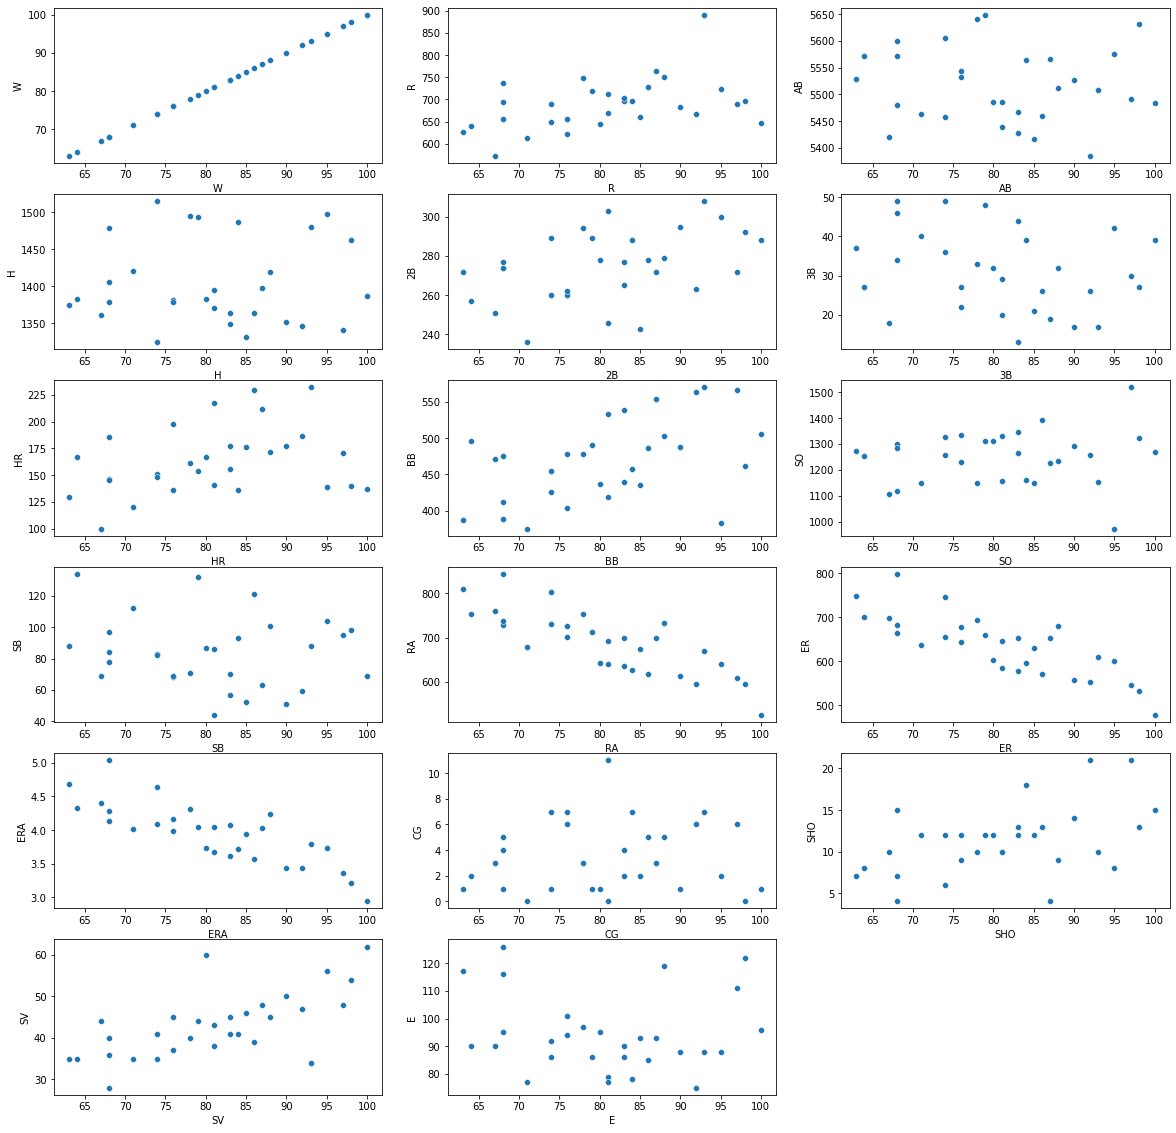

In [13]:
# Checking for the relationship between target variable and features

plt.figure(figsize=(20,20), facecolor ='white')
pltnumber=1

for column in df:
    if pltnumber<=17:
        ax = plt.subplot(6,3,pltnumber)
        sns.scatterplot(x=df['W'],y=df[column])
        plt.xlabel(column,fontsize=10)
    pltnumber +=1
plt.show()  #plt.show()

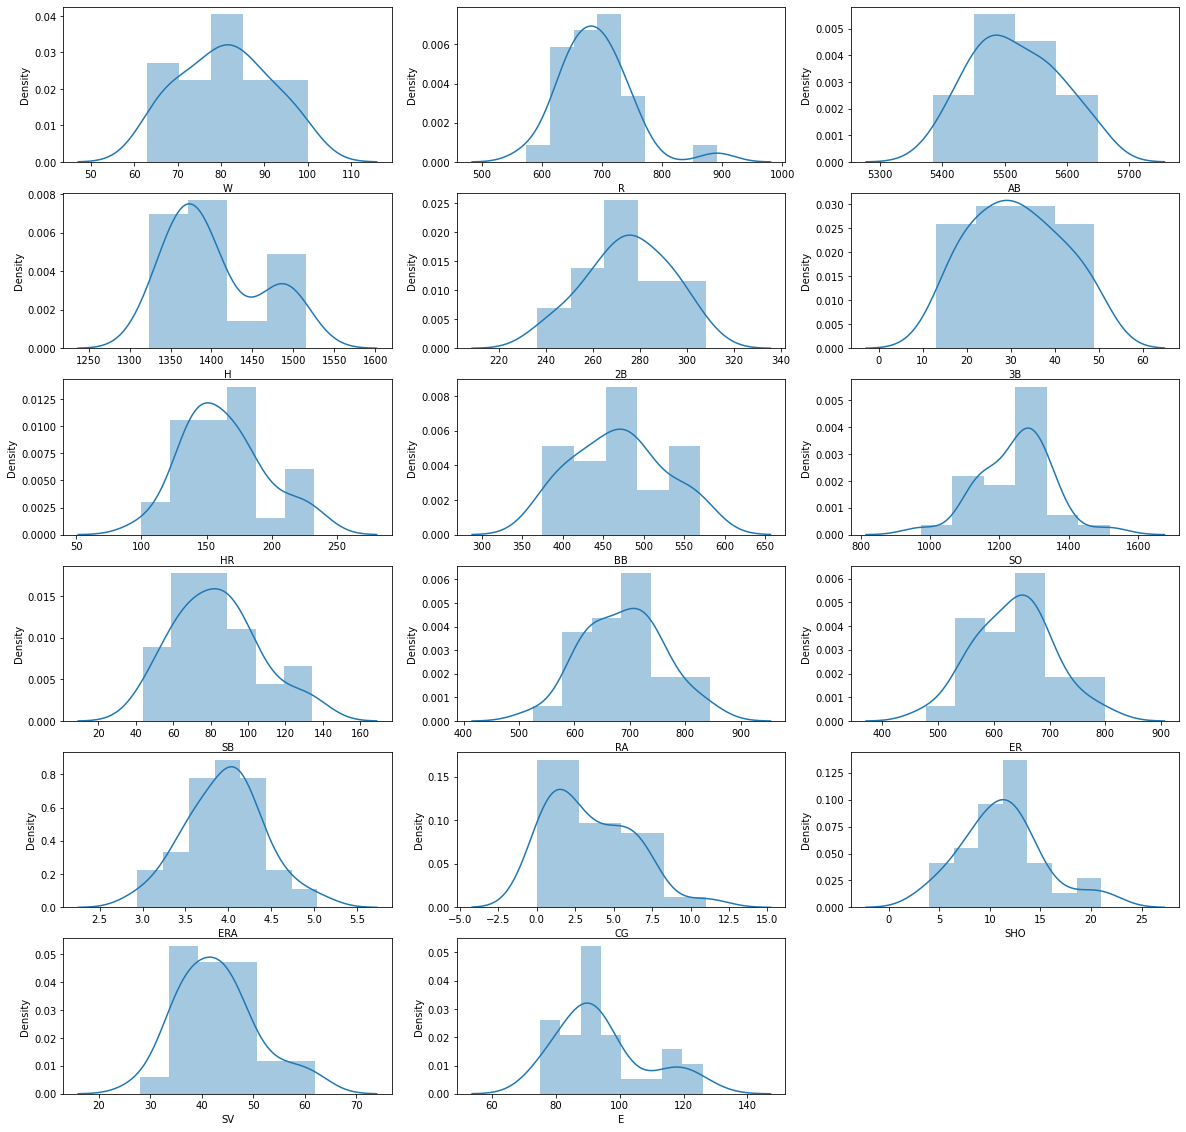

In [14]:
# Checking the data distribution
plt.figure(figsize=(20,20), facecolor ='white')
pltnumber=1

for column in df:
    if pltnumber<=17:
        ax = plt.subplot(6,3,pltnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
    pltnumber +=1
plt.show()  #plt.show()

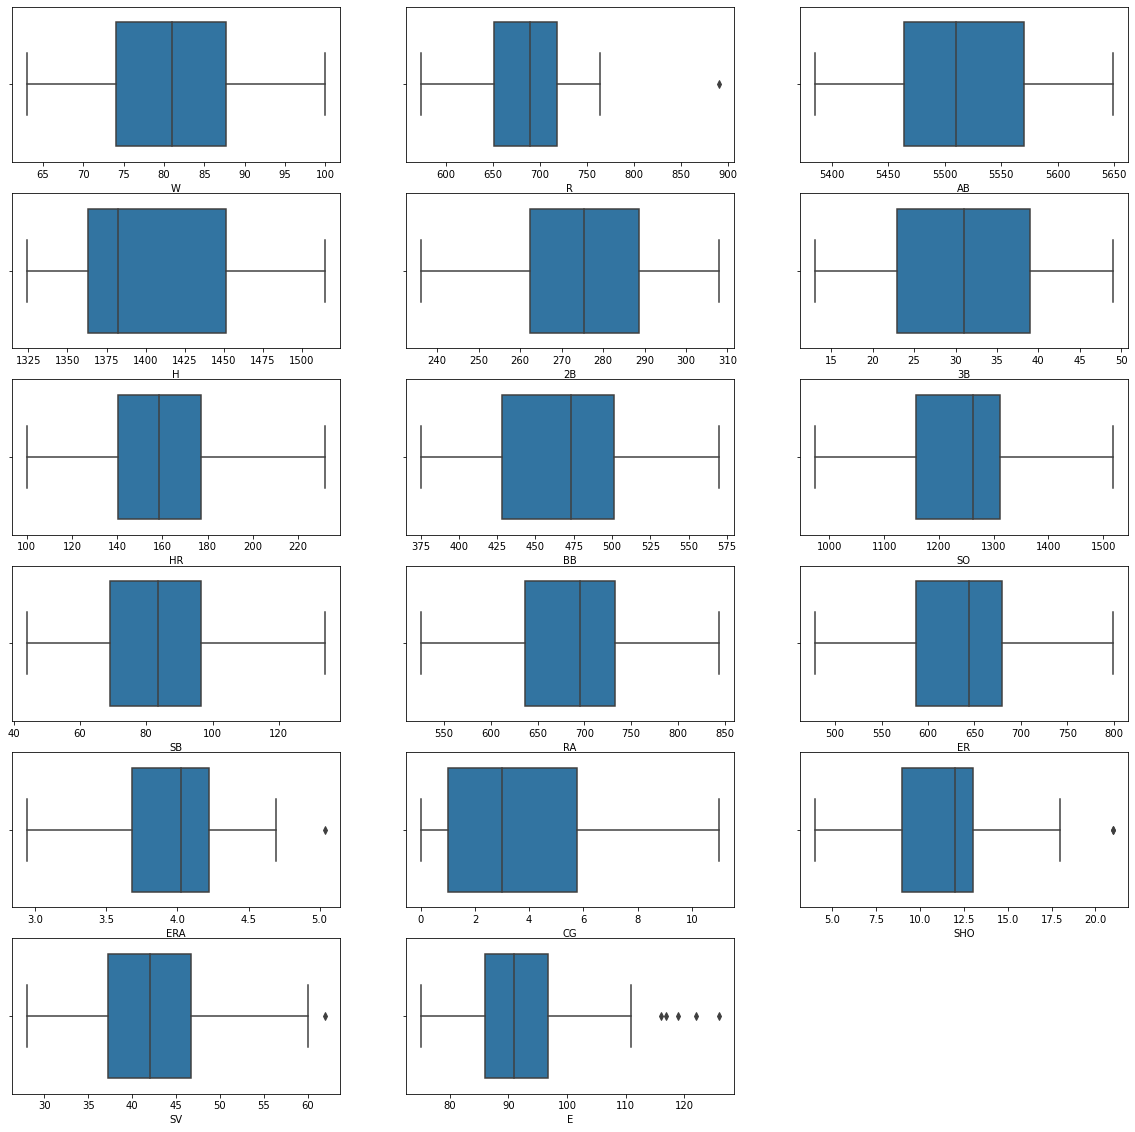

In [15]:
# Checking the outliers using boxplot

plt.figure(figsize=(20,20), facecolor ='white')
pltnumber=1

for column in df:
    if pltnumber<=17:
        ax = plt.subplot(6,3,pltnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=10)
    pltnumber +=1
plt.show()  #plt.show()

In [17]:
# Checking for the skewness
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [19]:
# Feature selection
x=df.drop("W",axis=1)
y=df["W"]

In [18]:
# Removing skewness from the columns using power transform method
#importing power transform from sklearn library
from sklearn.preprocessing import power_transform

In [20]:
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [21]:
x=power_transform(x,method="yeo-johnson")
x

array([[ 0.        ,  0.        ,  0.        ,  1.47768528,  1.03310301,
        -0.76462586, -1.61091476, -2.56989562,  0.93970819, -0.66033096,
        -0.49742469, -0.50089346, -0.35984364, -0.78957937,  1.546378  ,
        -0.3349525 ],
       [ 0.        ,  0.        ,  0.        ,  0.08426878,  1.2033202 ,
        -0.15858141, -0.50274883,  0.13491294, -0.53969308,  0.17546536,
         0.25797351,  0.26180619, -0.35984364,  0.25177537,  0.36044386,
        -0.53221128],
       [ 0.        ,  0.        ,  0.        ,  1.67078208, -0.16026987,
        -0.68967629,  1.1282937 , -0.90125379,  0.2119555 , -0.67462053,
        -0.74690639, -0.63645949,  1.99351257, -0.24539345, -0.6075936 ,
        -1.34233137],
       [ 0.        ,  0.        ,  0.        , -0.84859969, -0.36052064,
        -0.8790486 , -1.18120722, -0.1896282 , -0.64256433,  0.18951225,
         0.11357524,  0.06080381,  1.22010317, -0.51075929, -0.76445333,
         0.67852361],
       [ 0.        ,  0.        ,  0

In [22]:
# Scaling the data using standard scalar
x_scaled=StandardScaler().fit_transform(x)
print(x_scaled)

[[ 0.          0.          0.          1.47768528  1.03310301 -0.76462586
  -1.61091476 -2.56989562  0.93970819 -0.66033096 -0.49742469 -0.50089346
  -0.35984364 -0.78957937  1.546378   -0.3349525 ]
 [ 0.          0.          0.          0.08426878  1.2033202  -0.15858141
  -0.50274883  0.13491294 -0.53969308  0.17546536  0.25797351  0.26180619
  -0.35984364  0.25177537  0.36044386 -0.53221128]
 [ 0.          0.          0.          1.67078208 -0.16026987 -0.68967629
   1.1282937  -0.90125379  0.2119555  -0.67462053 -0.74690639 -0.63645949
   1.99351257 -0.24539345 -0.6075936  -1.34233137]
 [ 0.          0.          0.         -0.84859969 -0.36052064 -0.8790486
  -1.18120722 -0.1896282  -0.64256433  0.18951225  0.11357524  0.06080381
   1.22010317 -0.51075929 -0.76445333  0.67852361]
 [ 0.          0.          0.          0.79218291  1.61644394 -0.3298501
  -0.20677062  0.08545863  0.07962852  1.6032282   1.5826538   1.52095856
   1.22010317  0.25177537 -1.09501024 -0.53221128]
 [ 0.  

In [23]:
# Model fitting
#Lets import the libraries for model fitting
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score



In [24]:
# finding the best random state number
best_rstate=0
accu=0
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=.25,random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    predmod=mod.predict(x_test)
    tempaccu=r2_score(y_test,predmod)
    if tempaccu>accu:
        accu=tempaccu
        best_rstate=i
print(f" best accuracy={accu*100} found on random_state{best_rstate}")
print("mean squared error:",mean_squared_error(y_test,predmod))
print("mean absolute error:",mean_absolute_error(y_test,predmod))

 best accuracy=91.94918946841459 found on random_state923
mean squared error: 176.33118303260287
mean absolute error: 8.431478130957956


In [25]:
#training the dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=923)

In [27]:
#Finding the best model
sv=SVR(kernel='linear')
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
kn=KNeighborsRegressor()
ab=AdaBoostRegressor()
ls=Lasso()
rd=Ridge()
lr=LinearRegression()
model=[lr,sv,dt,rf,kn,ab,ls,rd]
kf = KFold(n_splits=5, random_state=54, shuffle=True)

train=[]
test=[]
Mse=[]
cv=[]

for m in model:
    m.fit(x_train,y_train)
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    train_score=r2_score(y_train,pred_train)
    train.append(train_score)
    test_score=r2_score(y_test,pred_test)
    test.append(test_score)
    mse = mean_squared_error(y_test,pred_test)
    Mse.append(mse)
    score=cross_val_score(m,x,y,cv=kf)
    cv.append(score.mean())
    
Performance={'Model':['Linear Regression','SupportVector','DecisionTree','RandomForest','KNN','AdaBoost','Lasso','Ridge'],
             'Training Score':train,
            'Test Score':test,
            'Mean Square Error':Mse,
            'Cross Validation Score': cv}
Performance=pd.DataFrame(data=Performance)
Performance

,Model,Training Score,Test Score,Mean Square Error,Cross Validation Score
0,Linear Regression,0.851535,0.903244,10.495355,-0.233400
1,SupportVector,0.806517,0.871019,13.990841,0.403720
2,DecisionTree,1.000000,0.411524,63.833333,-0.768983
3,RandomForest,0.917293,0.453697,59.258700,0.125163
4,KNN,0.616470,0.374402,67.860000,0.316061
5,AdaBoost,0.989399,0.392156,65.934156,0.192256
6,Lasso,0.792861,0.755263,26.547125,0.451553
7,Ridge,0.843411,0.848259,16.459701,0.273229


In [ ]:
# Lasso is best that fits the model as it has the minimumm difference between the accuracy & cv score